<a href="https://colab.research.google.com/github/Puphat/Coupon_Design_and_Targeting/blob/main/Coupon_Design_and_Targeting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link_file = 'https://drive.google.com/file/d/1drkHT6OhBx6T-KhxbYRvdOasfDnReW3p/view?usp=share_link'
_,_,_,_,_,id,_ = link_file.split('/')
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Example_Customer.csv')

In [ ]:
link_file = 'https://drive.google.com/file/d/1Pj2mywd9kDC-9xfn9SOP9hFLOm6m3TBa/view?usp=share_link'
_,_,_,_,_,id,_ = link_file.split('/')
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Customer_Target.csv')

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
df_target = pd.read_csv("Customer_Target.csv")
df_target = df_target.set_index('customer_id')
df_target['Purchased'] = '1'
df_target

,Target Spend,Purchased
customer_id,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,2096.0,1
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,16357.0,1
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,1144.0,1
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,793.0,1
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,7498.0,1
...,...,...
ffff2f5a160e334d722d2f2c36be9907f6d097a141e49b72d56db00f5788bef8,6256.0,1
ffff4c4e8b57b633c1ddf8fbd53db16b962cf831baf9ed67c6a53d86e167a35b,1904.0,1
ffff61677073258d461e043cc9ed4ed97be5617a920640ff61024f4619bf41c4,1651.0,1


In [ ]:
df = pd.read_csv("Example_Customer.csv")
id = 'customer_id'
df = df.set_index(id)
df

,t_dat_parsed_first,t_dat_parsed_last,Month_first,Month_last,Frequency,Spend min,Spend max,Spend avg,Spend total,Spend stddev,Spend first,Spend last,sales_channel_id_distinct
customer_id,,,,,,,,,,,,,
00019d6c20e0fbb551af18c57149af4707ec016bb0decdf064cdae15ab1569a8,2019-02-25T00:00:00.000Z,2019-03-02T00:00:00.000Z,2,3,3,317.0,476.0,423.000000,1269.0,91.798693,476.0,476.0,1
0002db27a1651998a3de4463437b580b45dfa7d8107afa778daad67b3d015d94,2019-03-01T00:00:00.000Z,2019-03-01T00:00:00.000Z,3,3,2,635.0,953.0,794.000000,1588.0,224.859956,953.0,953.0,1
00068fc247894dc159e7f6246cebb2eaaca3a65b93a8a9b9eef5a26edc8c8de1,2019-01-17T00:00:00.000Z,2019-01-17T00:00:00.000Z,1,1,2,85.0,85.0,85.000000,170.0,0.000000,85.0,85.0,1
000c7c794543cdb6fcd29d9c82f34cd1c0c50f0ceb6010890d66bec7f21d5d16,2019-01-17T00:00:00.000Z,2019-03-22T00:00:00.000Z,1,3,5,234.0,1024.0,559.000000,2795.0,310.992765,585.0,317.0,2
000da3d7d0ef65573d455266b21b085483913d296f65cc20bfc3c1035f5346f7,2019-02-24T00:00:00.000Z,2019-02-24T00:00:00.000Z,2,2,10,317.0,635.0,527.000000,5270.0,126.538532,317.0,317.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd0248a95c2e49fee876ff93598e2e20839e51b9b7678aab75d9e8f9f3c6c8,2019-03-25T00:00:00.000Z,2019-03-25T00:00:00.000Z,3,3,11,159.0,1271.0,586.000000,6446.0,329.199332,317.0,317.0,1
fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd0eb40a3065971d0e01,2019-01-31T00:00:00.000Z,2019-03-27T00:00:00.000Z,1,3,8,310.0,953.0,574.750000,4598.0,236.719092,508.0,794.0,1
fffe07d525eb921d883a0741fbf96bcdbd194e6bb0ccb769965b04b87664654d,2019-02-01T00:00:00.000Z,2019-02-04T00:00:00.000Z,2,2,2,372.0,413.0,392.500000,785.0,28.991378,372.0,413.0,1


In [ ]:
print(type('t_dat_parsed_last'))

<class 'str'>


In [ ]:
date_cutoff = dt.date(2019, 3, 31)
print(date_cutoff)

2019-03-31


In [ ]:
df['Last_date'] = pd.DatetimeIndex(df['t_dat_parsed_last']).date
df['First_date'] = pd.DatetimeIndex(df['t_dat_parsed_first']).date
df.head()

,t_dat_parsed_first,t_dat_parsed_last,Month_first,Month_last,Frequency,Spend min,Spend max,Spend avg,Spend total,Spend stddev,Spend first,Spend last,sales_channel_id_distinct,Last_date,First_date
customer_id,,,,,,,,,,,,,,,
00019d6c20e0fbb551af18c57149af4707ec016bb0decdf064cdae15ab1569a8,2019-02-25T00:00:00.000Z,2019-03-02T00:00:00.000Z,2,3,3,317.0,476.0,423.0,1269.0,91.798693,476.0,476.0,1,2019-03-02,2019-02-25
0002db27a1651998a3de4463437b580b45dfa7d8107afa778daad67b3d015d94,2019-03-01T00:00:00.000Z,2019-03-01T00:00:00.000Z,3,3,2,635.0,953.0,794.0,1588.0,224.859956,953.0,953.0,1,2019-03-01,2019-03-01
00068fc247894dc159e7f6246cebb2eaaca3a65b93a8a9b9eef5a26edc8c8de1,2019-01-17T00:00:00.000Z,2019-01-17T00:00:00.000Z,1,1,2,85.0,85.0,85.0,170.0,0.000000,85.0,85.0,1,2019-01-17,2019-01-17
000c7c794543cdb6fcd29d9c82f34cd1c0c50f0ceb6010890d66bec7f21d5d16,2019-01-17T00:00:00.000Z,2019-03-22T00:00:00.000Z,1,3,5,234.0,1024.0,559.0,2795.0,310.992765,585.0,317.0,2,2019-03-22,2019-01-17
000da3d7d0ef65573d455266b21b085483913d296f65cc20bfc3c1035f5346f7,2019-02-24T00:00:00.000Z,2019-02-24T00:00:00.000Z,2,2,10,317.0,635.0,527.0,5270.0,126.538532,317.0,317.0,1,2019-02-24,2019-02-24


In [ ]:
df['Recency'] = df['Last_date'].apply(lambda x: (date_cutoff - x).days)
df['Customer_life'] = df['First_date'].apply(lambda x: (date_cutoff - x).days)
df.head()

,t_dat_parsed_first,t_dat_parsed_last,Month_first,Month_last,Frequency,Spend min,Spend max,Spend avg,Spend total,Spend stddev,Spend first,Spend last,sales_channel_id_distinct,Last_date,First_date,Recency,Customer_life
customer_id,,,,,,,,,,,,,,,,,
00019d6c20e0fbb551af18c57149af4707ec016bb0decdf064cdae15ab1569a8,2019-02-25T00:00:00.000Z,2019-03-02T00:00:00.000Z,2,3,3,317.0,476.0,423.0,1269.0,91.798693,476.0,476.0,1,2019-03-02,2019-02-25,29,34
0002db27a1651998a3de4463437b580b45dfa7d8107afa778daad67b3d015d94,2019-03-01T00:00:00.000Z,2019-03-01T00:00:00.000Z,3,3,2,635.0,953.0,794.0,1588.0,224.859956,953.0,953.0,1,2019-03-01,2019-03-01,30,30
00068fc247894dc159e7f6246cebb2eaaca3a65b93a8a9b9eef5a26edc8c8de1,2019-01-17T00:00:00.000Z,2019-01-17T00:00:00.000Z,1,1,2,85.0,85.0,85.0,170.0,0.000000,85.0,85.0,1,2019-01-17,2019-01-17,73,73
000c7c794543cdb6fcd29d9c82f34cd1c0c50f0ceb6010890d66bec7f21d5d16,2019-01-17T00:00:00.000Z,2019-03-22T00:00:00.000Z,1,3,5,234.0,1024.0,559.0,2795.0,310.992765,585.0,317.0,2,2019-03-22,2019-01-17,9,73
000da3d7d0ef65573d455266b21b085483913d296f65cc20bfc3c1035f5346f7,2019-02-24T00:00:00.000Z,2019-02-24T00:00:00.000Z,2,2,10,317.0,635.0,527.0,5270.0,126.538532,317.0,317.0,1,2019-02-24,2019-02-24,35,35


In [ ]:
print(type('Last_date'))
LD = pd.to_datetime(df['Last_date'])
FD = pd.to_datetime(df['First_date'])
delta = (LD - FD) / df['Frequency']
df['MTWP'] = delta.dt.days
df

<class 'str'>


,t_dat_parsed_first,t_dat_parsed_last,Month_first,Month_last,Frequency,Spend min,Spend max,Spend avg,Spend total,Spend stddev,Spend first,Spend last,sales_channel_id_distinct,Last_date,First_date,Recency,Customer_life,MTWP
customer_id,,,,,,,,,,,,,,,,,,
00019d6c20e0fbb551af18c57149af4707ec016bb0decdf064cdae15ab1569a8,2019-02-25T00:00:00.000Z,2019-03-02T00:00:00.000Z,2,3,3,317.0,476.0,423.000000,1269.0,91.798693,476.0,476.0,1,2019-03-02,2019-02-25,29,34,1
0002db27a1651998a3de4463437b580b45dfa7d8107afa778daad67b3d015d94,2019-03-01T00:00:00.000Z,2019-03-01T00:00:00.000Z,3,3,2,635.0,953.0,794.000000,1588.0,224.859956,953.0,953.0,1,2019-03-01,2019-03-01,30,30,0
00068fc247894dc159e7f6246cebb2eaaca3a65b93a8a9b9eef5a26edc8c8de1,2019-01-17T00:00:00.000Z,2019-01-17T00:00:00.000Z,1,1,2,85.0,85.0,85.000000,170.0,0.000000,85.0,85.0,1,2019-01-17,2019-01-17,73,73,0
000c7c794543cdb6fcd29d9c82f34cd1c0c50f0ceb6010890d66bec7f21d5d16,2019-01-17T00:00:00.000Z,2019-03-22T00:00:00.000Z,1,3,5,234.0,1024.0,559.000000,2795.0,310.992765,585.0,317.0,2,2019-03-22,2019-01-17,9,73,12
000da3d7d0ef65573d455266b21b085483913d296f65cc20bfc3c1035f5346f7,2019-02-24T00:00:00.000Z,2019-02-24T00:00:00.000Z,2,2,10,317.0,635.0,527.000000,5270.0,126.538532,317.0,317.0,1,2019-02-24,2019-02-24,35,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd0248a95c2e49fee876ff93598e2e20839e51b9b7678aab75d9e8f9f3c6c8,2019-03-25T00:00:00.000Z,2019-03-25T00:00:00.000Z,3,3,11,159.0,1271.0,586.000000,6446.0,329.199332,317.0,317.0,1,2019-03-25,2019-03-25,6,6,0
fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd0eb40a3065971d0e01,2019-01-31T00:00:00.000Z,2019-03-27T00:00:00.000Z,1,3,8,310.0,953.0,574.750000,4598.0,236.719092,508.0,794.0,1,2019-03-27,2019-01-31,4,59,6
fffe07d525eb921d883a0741fbf96bcdbd194e6bb0ccb769965b04b87664654d,2019-02-01T00:00:00.000Z,2019-02-04T00:00:00.000Z,2,2,2,372.0,413.0,392.500000,785.0,28.991378,372.0,413.0,1,2019-02-04,2019-02-01,55,58,1


In [ ]:
merged_df = pd.merge(df, df_target, on='customer_id', how='left')
trainingset = merged_df
trainingset['Purchased'].fillna(0, inplace=True)
trainingset['Spend stddev'].fillna(0, inplace=True)
trainingset['Target Spend'].fillna(0, inplace=True)
trainingset

,t_dat_parsed_first,t_dat_parsed_last,Month_first,Month_last,Frequency,Spend min,Spend max,Spend avg,Spend total,Spend stddev,Spend first,Spend last,sales_channel_id_distinct,Last_date,First_date,Recency,Customer_life,MTWP,Target Spend,Purchased
customer_id,,,,,,,,,,,,,,,,,,,,
00019d6c20e0fbb551af18c57149af4707ec016bb0decdf064cdae15ab1569a8,2019-02-25T00:00:00.000Z,2019-03-02T00:00:00.000Z,2,3,3,317.0,476.0,423.000000,1269.0,91.798693,476.0,476.0,1,2019-03-02,2019-02-25,29,34,1,3492.0,1
0002db27a1651998a3de4463437b580b45dfa7d8107afa778daad67b3d015d94,2019-03-01T00:00:00.000Z,2019-03-01T00:00:00.000Z,3,3,2,635.0,953.0,794.000000,1588.0,224.859956,953.0,953.0,1,2019-03-01,2019-03-01,30,30,0,698.0,1
00068fc247894dc159e7f6246cebb2eaaca3a65b93a8a9b9eef5a26edc8c8de1,2019-01-17T00:00:00.000Z,2019-01-17T00:00:00.000Z,1,1,2,85.0,85.0,85.000000,170.0,0.000000,85.0,85.0,1,2019-01-17,2019-01-17,73,73,0,0.0,0
000c7c794543cdb6fcd29d9c82f34cd1c0c50f0ceb6010890d66bec7f21d5d16,2019-01-17T00:00:00.000Z,2019-03-22T00:00:00.000Z,1,3,5,234.0,1024.0,559.000000,2795.0,310.992765,585.0,317.0,2,2019-03-22,2019-01-17,9,73,12,1937.0,1
000da3d7d0ef65573d455266b21b085483913d296f65cc20bfc3c1035f5346f7,2019-02-24T00:00:00.000Z,2019-02-24T00:00:00.000Z,2,2,10,317.0,635.0,527.000000,5270.0,126.538532,317.0,317.0,1,2019-02-24,2019-02-24,35,35,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd0248a95c2e49fee876ff93598e2e20839e51b9b7678aab75d9e8f9f3c6c8,2019-03-25T00:00:00.000Z,2019-03-25T00:00:00.000Z,3,3,11,159.0,1271.0,586.000000,6446.0,329.199332,317.0,317.0,1,2019-03-25,2019-03-25,6,6,0,3397.0,1
fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd0eb40a3065971d0e01,2019-01-31T00:00:00.000Z,2019-03-27T00:00:00.000Z,1,3,8,310.0,953.0,574.750000,4598.0,236.719092,508.0,794.0,1,2019-03-27,2019-01-31,4,59,6,1936.0,1
fffe07d525eb921d883a0741fbf96bcdbd194e6bb0ccb769965b04b87664654d,2019-02-01T00:00:00.000Z,2019-02-04T00:00:00.000Z,2,2,2,372.0,413.0,392.500000,785.0,28.991378,372.0,413.0,1,2019-02-04,2019-02-01,55,58,1,0.0,0


In [ ]:
trainingset.dtypes

t_dat_parsed_first            object
t_dat_parsed_last             object
Month_first                    int64
Month_last                     int64
Frequency                      int64
Spend min                    float64
Spend max                    float64
Spend avg                    float64
Spend total                  float64
Spend stddev                 float64
Spend first                  float64
Spend last                   float64
sales_channel_id_distinct      int64
Last_date                     object
First_date                    object
Recency                        int64
Customer_life                  int64
MTWP                           int64
Target Spend                 float64
Purchased                     object
dtype: object

In [ ]:
col_types = list(zip(trainingset.columns,trainingset.dtypes.to_list()))
numeric_columns = trainingset[['Frequency', 'Spend avg', 'Spend stddev', 'MTWP', 'Spend total', 'Customer_life']]
numeric_cols = numeric_columns.select_dtypes(include = [np.number]).columns.tolist()
text_columns = list(trainingset.select_dtypes(['object']).columns)

In [ ]:
##Check duplication of ID Columns
no_rows = trainingset.index.size
no_unique = trainingset.index.nunique()
if no_rows != no_unique:
  print('\nDuplication Warning:')
  print(' The total records of ' + col + ' is ' + str(no_rows) + 
        ' but the total number of distinct records is ' + str(no_unique))
else:
  print('\nNo Duplication Found in ID column')


No Duplication Found in ID column



Numerical columns: Frequency, Spend avg, Spend stddev, MTWP, Spend total, Customer_life

Summary Statistics of Frequency
mean : 7.5
median : 5.0
std. dev. : 9.255


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

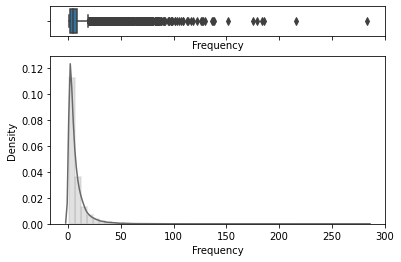


Summary Statistics of Spend avg
mean : 523.38
median : 476.0
std. dev. : 270.021


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

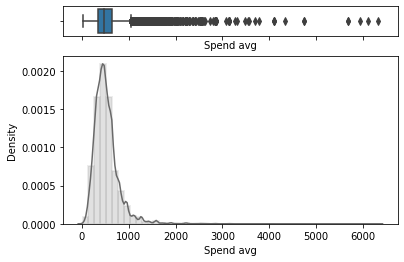


Summary Statistics of Spend stddev
mean : 188.74
median : 166.06
std. dev. : 178.271


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

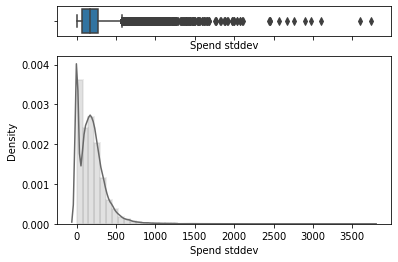


Summary Statistics of MTWP
mean : 2.34
median : 0.0
std. dev. : 4.295


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

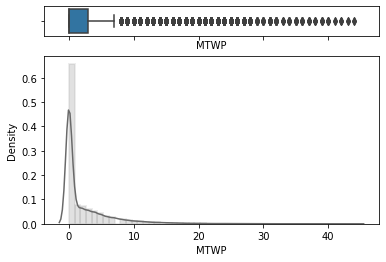


Summary Statistics of Spend total
mean : 3883.26
median : 2159.0
std. dev. : 5367.011


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

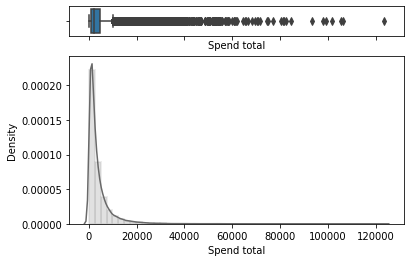


Summary Statistics of Customer_life
mean : 53.44
median : 58.0
std. dev. : 25.413


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

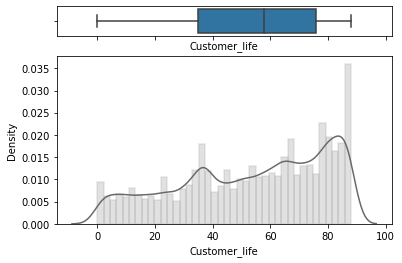

In [ ]:
##Explore Numeric Columns
numeric_cols = numeric_columns.select_dtypes(include = [np.number])
if len(numeric_cols) != 0:
    print('\nNumerical columns: ' + ", ".join(numeric_cols))
    for i, col in enumerate(numeric_cols, 1):
        print('\nSummary Statistics of ' + col)
        print('mean : ' + str(round(trainingset[col].mean(), 2)))
        print('median : ' + str(round(trainingset[col].median(), 2)))
        print('std. dev. : ' + str(round(trainingset[col].std(), 3)))
        plt.figure(i)
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        sns.distplot(trainingset[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)
        sns.boxplot(x=trainingset[col], ax=ax_box)
        plt.show()

else:
    print('\nThere is no numeric column')

In [ ]:
features = trainingset[['Frequency', 'Recency', 'Spend avg', 'Spend stddev', 'MTWP']]
trainingset_std = pd.DataFrame(StandardScaler().fit_transform(features))
trainingset_std

,0,1,2,3,4
0,-0.486361,-0.206558,-0.371764,-0.543798,-0.311669
1,-0.594408,-0.167344,1.002217,0.202608,-0.544480
2,-0.594408,1.518852,-1.623532,-1.058743,-0.544480
3,-0.270267,-0.990835,0.131905,0.685770,2.249250
4,0.269969,0.028725,0.013395,-0.348926,-0.544480
...,...,...,...,...,...
49283,0.378016,-1.108476,0.231899,0.787899,-0.544480
49284,0.053874,-1.186904,0.190235,0.269132,0.852385
49285,-0.594408,0.813003,-0.484720,-0.896116,-0.311669
49286,3.403332,-1.069263,-0.459603,0.126091,-0.078858


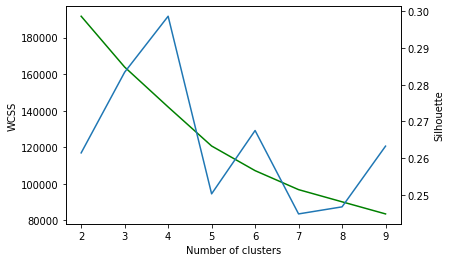

In [ ]:
k = 10
wcss=[]
sil=[]

for i in range(2,k): 
     cluster = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0)
     cluster.fit_predict(trainingset_std)
     wcss.append(cluster.inertia_)
     labels = cluster.labels_
     sil.append(silhouette_score(trainingset_std, labels, metric = 'euclidean'))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(range(2,k),wcss, label='WCSS', color='green')
ax2.plot(range(2,k), sil, label='Silhouette')

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS')
ax2.set_ylabel('Silhouette')

plt.show()

In [ ]:
final_k = 4

final_cluster = KMeans(n_clusters=final_k, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
final_cluster.fit_predict(trainingset_std)
trainingset['cluster'] = final_cluster.fit_predict(trainingset_std)
trainingset

,t_dat_parsed_first,t_dat_parsed_last,Month_first,Month_last,Frequency,Spend min,Spend max,Spend avg,Spend total,Spend stddev,...,Spend last,sales_channel_id_distinct,Last_date,First_date,Recency,Customer_life,MTWP,Target Spend,Purchased,cluster
customer_id,,,,,,,,,,,,,,,,,,,,,
00019d6c20e0fbb551af18c57149af4707ec016bb0decdf064cdae15ab1569a8,2019-02-25T00:00:00.000Z,2019-03-02T00:00:00.000Z,2,3,3,317.0,476.0,423.000000,1269.0,91.798693,...,476.0,1,2019-03-02,2019-02-25,29,34,1,3492.0,1,2
0002db27a1651998a3de4463437b580b45dfa7d8107afa778daad67b3d015d94,2019-03-01T00:00:00.000Z,2019-03-01T00:00:00.000Z,3,3,2,635.0,953.0,794.000000,1588.0,224.859956,...,953.0,1,2019-03-01,2019-03-01,30,30,0,698.0,1,3
00068fc247894dc159e7f6246cebb2eaaca3a65b93a8a9b9eef5a26edc8c8de1,2019-01-17T00:00:00.000Z,2019-01-17T00:00:00.000Z,1,1,2,85.0,85.0,85.000000,170.0,0.000000,...,85.0,1,2019-01-17,2019-01-17,73,73,0,0.0,0,2
000c7c794543cdb6fcd29d9c82f34cd1c0c50f0ceb6010890d66bec7f21d5d16,2019-01-17T00:00:00.000Z,2019-03-22T00:00:00.000Z,1,3,5,234.0,1024.0,559.000000,2795.0,310.992765,...,317.0,2,2019-03-22,2019-01-17,9,73,12,1937.0,1,0
000da3d7d0ef65573d455266b21b085483913d296f65cc20bfc3c1035f5346f7,2019-02-24T00:00:00.000Z,2019-02-24T00:00:00.000Z,2,2,10,317.0,635.0,527.000000,5270.0,126.538532,...,317.0,1,2019-02-24,2019-02-24,35,35,0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd0248a95c2e49fee876ff93598e2e20839e51b9b7678aab75d9e8f9f3c6c8,2019-03-25T00:00:00.000Z,2019-03-25T00:00:00.000Z,3,3,11,159.0,1271.0,586.000000,6446.0,329.199332,...,317.0,1,2019-03-25,2019-03-25,6,6,0,3397.0,1,1
fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd0eb40a3065971d0e01,2019-01-31T00:00:00.000Z,2019-03-27T00:00:00.000Z,1,3,8,310.0,953.0,574.750000,4598.0,236.719092,...,794.0,1,2019-03-27,2019-01-31,4,59,6,1936.0,1,0
fffe07d525eb921d883a0741fbf96bcdbd194e6bb0ccb769965b04b87664654d,2019-02-01T00:00:00.000Z,2019-02-04T00:00:00.000Z,2,2,2,372.0,413.0,392.500000,785.0,28.991378,...,413.0,1,2019-02-04,2019-02-01,55,58,1,0.0,0,2


In [ ]:
X = features
y = trainingset['cluster']

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
y_pred=clf.predict(X)

print("=== Confusion Matrix ===")
print(confusion_matrix(y, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y, y_pred))

=== Confusion Matrix ===
[[ 7564     0   416     3]
 [  167  6000  1029     0]
 [  602   262 25797     0]
 [  727   616  6047    58]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7983
           1       0.87      0.83      0.85      7196
           2       0.77      0.97      0.86     26661
           3       0.95      0.01      0.02      7448

    accuracy                           0.80     49288
   macro avg       0.86      0.69      0.65     49288
weighted avg       0.83      0.80      0.74     49288



In [ ]:
for i in range(4):
    filtered_df = trainingset[trainingset['cluster'].astype(int) == i]
    result = pd.DataFrame(filtered_df)
    print('Cluster ' + str(i))
    print('Frequency Avg: ' + str(result['Frequency'].mean()))
    print('Recency Avg: ' + str(result['Recency'].mean()))
    print('Spend Avg: ' + str(result['Spend avg'].mean()))
    print('Spend stddev: ' + str(result['Spend stddev'].mean()))
    print('MTWP: ' + str(result['MTWP'].mean()))

Cluster 0
Frequency Avg: 6.011399223349618
Recency Avg: 14.930226731805085
Spend Avg: 478.1715228061151
Spend stddev: 220.41123296105098
MTWP: 9.9463860703996
Cluster 1
Frequency Avg: 23.496525847693164
Recency Avg: 14.891328515842135
Spend Avg: 508.205186790162
Spend stddev: 261.67611183076303
MTWP: 1.9137020566981657
Cluster 2
Frequency Avg: 4.149019166572897
Recency Avg: 45.73905704962304
Spend Avg: 434.347514517341
Spend stddev: 105.48225465178612
MTWP: 0.4532463148419039
Cluster 3
Frequency Avg: 5.644602577873255
Recency Avg: 32.650375939849624
Spend Avg: 905.2204363299961
Spend stddev: 382.364300976089
MTWP: 1.3445220193340495


In [ ]:
# Create an empty dataframe
results_table = pd.DataFrame(columns=['Recency Avg', 'Frequency Avg', 'Spend Avg', 'Spend stddev', 'MTWP'])

for i in range(4):
    filtered_df = trainingset[trainingset['cluster'].astype(int) == i]
    result = pd.DataFrame(filtered_df)
    results_table = results_table.append({'Recency Avg': result['Recency'].mean(),
                                         'Frequency Avg': result['Frequency'].mean(),
                                         'Spend Avg': result['Spend avg'].mean(),
                                         'Spend stddev': result['Spend stddev'].mean(),
                                         'MTWP': result['MTWP'].mean()}, ignore_index=True)
results_table = results_table.set_index([pd.Index(range(4), name='Cluster')])
print(results_table)

         Recency Avg  Frequency Avg   Spend Avg  Spend stddev      MTWP
Cluster                                                                
0          14.930227       6.011399  478.171523    220.411233  9.946386
1          14.891329      23.496526  508.205187    261.676112  1.913702
2          45.739057       4.149019  434.347515    105.482255  0.453246
3          32.650376       5.644603  905.220436    382.364301  1.344522


In [ ]:
filtered_df = trainingset[trainingset['cluster'].astype(int) == 4][['Frequency','Spend avg','Spend stddev', 'MTWP', 'cluster']]
if filtered_df.empty:
    print('None')
else:
    result = pd.DataFrame(filtered_df)
    print('Cluster 4')
    print('Frequency Avg: ' + str(result['Frequency'].mean()))
    print('Spend Avg: ' + str(result['Spend avg'].mean()))
    print('Spend stddev: ' + str(result['Spend stddev'].mean()))
    print('MTWP: ' + str(result['MTWP'].mean()))


None


In [ ]:
print(trainingset['cluster'].max())

3


In [ ]:
trainingset['Purchased'].value_counts()

1    30509
0    18779
Name: Purchased, dtype: int64

In [ ]:
trainingset.isnull().sum()

t_dat_parsed_first           0
t_dat_parsed_last            0
Month_first                  0
Month_last                   0
Frequency                    0
Spend min                    0
Spend max                    0
Spend avg                    0
Spend total                  0
Spend stddev                 0
Spend first                  0
Spend last                   0
sales_channel_id_distinct    0
Last_date                    0
First_date                   0
Recency                      0
Customer_life                0
MTWP                         0
Target Spend                 0
Purchased                    0
cluster                      0
dtype: int64

In [ ]:
trainingset['Purchased'] = trainingset['Purchased'].astype(int)
x = trainingset.drop(['t_dat_parsed_first', 't_dat_parsed_last', 'Last_date', 'First_date', 'Target Spend', 'Purchased'], axis = 1)
y = trainingset['Purchased']
x

,Month_first,Month_last,Frequency,Spend min,Spend max,Spend avg,Spend total,Spend stddev,Spend first,Spend last,sales_channel_id_distinct,Recency,Customer_life,MTWP,cluster
customer_id,,,,,,,,,,,,,,,
00019d6c20e0fbb551af18c57149af4707ec016bb0decdf064cdae15ab1569a8,2,3,3,317.0,476.0,423.000000,1269.0,91.798693,476.0,476.0,1,29,34,1,2
0002db27a1651998a3de4463437b580b45dfa7d8107afa778daad67b3d015d94,3,3,2,635.0,953.0,794.000000,1588.0,224.859956,953.0,953.0,1,30,30,0,3
00068fc247894dc159e7f6246cebb2eaaca3a65b93a8a9b9eef5a26edc8c8de1,1,1,2,85.0,85.0,85.000000,170.0,0.000000,85.0,85.0,1,73,73,0,2
000c7c794543cdb6fcd29d9c82f34cd1c0c50f0ceb6010890d66bec7f21d5d16,1,3,5,234.0,1024.0,559.000000,2795.0,310.992765,585.0,317.0,2,9,73,12,0
000da3d7d0ef65573d455266b21b085483913d296f65cc20bfc3c1035f5346f7,2,2,10,317.0,635.0,527.000000,5270.0,126.538532,317.0,317.0,1,35,35,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd0248a95c2e49fee876ff93598e2e20839e51b9b7678aab75d9e8f9f3c6c8,3,3,11,159.0,1271.0,586.000000,6446.0,329.199332,317.0,317.0,1,6,6,0,1
fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd0eb40a3065971d0e01,1,3,8,310.0,953.0,574.750000,4598.0,236.719092,508.0,794.0,1,4,59,6,0
fffe07d525eb921d883a0741fbf96bcdbd194e6bb0ccb769965b04b87664654d,2,2,2,372.0,413.0,392.500000,785.0,28.991378,372.0,413.0,1,55,58,1,2


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size = 0.2, random_state=0)

In [ ]:
trainingset.dtypes

t_dat_parsed_first            object
t_dat_parsed_last             object
Month_first                    int64
Month_last                     int64
Frequency                      int64
Spend min                    float64
Spend max                    float64
Spend avg                    float64
Spend total                  float64
Spend stddev                 float64
Spend first                  float64
Spend last                   float64
sales_channel_id_distinct      int64
Last_date                     object
First_date                    object
Recency                        int64
Customer_life                  int64
MTWP                           int64
Target Spend                 float64
Purchased                      int64
cluster                        int32
dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logistic = LogisticRegression(solver='liblinear', class_weight = 'balanced')
ls_y_hat_train = []
ls_y_train = []
logistic_model = logistic.fit(x_train, y_train)
y_hat_train = logistic_model.predict(x_train)
ls_y_hat_train.extend(y_hat_train)
ls_y_train.extend(y_train)
report_train = classification_report(ls_y_train, ls_y_hat_train)
print('training Set')
print(report_train)

ls_y_hat_test = []
ls_y_test = []
y_hat_test = logistic_model.predict(x_test)
ls_y_hat_test.extend(y_hat_test)
ls_y_test.extend(y_test)
report_test = classification_report(ls_y_test, ls_y_hat_test)
print('test set')
print(report_test)

training Set
              precision    recall  f1-score   support

           0       0.51      0.82      0.63     15009
           1       0.82      0.51      0.63     24421

    accuracy                           0.63     39430
   macro avg       0.66      0.66      0.63     39430
weighted avg       0.70      0.63      0.63     39430

test set
              precision    recall  f1-score   support

           0       0.51      0.82      0.63      3770
           1       0.82      0.51      0.63      6088

    accuracy                           0.63      9858
   macro avg       0.66      0.67      0.63      9858
weighted avg       0.70      0.63      0.63      9858



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_scaled)
x_train_scaled.columns = x_train.columns

x_scaled = scaler.fit_transform(x_test)
x_test_scaled = pd.DataFrame(x_scaled)
x_test_scaled.columns = x_test.columns

In [ ]:
def classification_model(logistic, x_train, y_train, x_test, y_test, show_feature_importance=True):
  ls_y_hat_train = []
  ls_y_train = []
  logistic_model = logistic.fit(x_train, y_train)
  y_hat_train = logistic_model.predict(x_train)
  ls_y_hat_train.extend(y_hat_train)
  ls_y_train.extend(y_train)
  report_train = classification_report(ls_y_train, ls_y_hat_train)
  print('training_set')
  print(report_train)
  ls_y_hat_test = []
  ls_y_test = []
  y_hat_test = logistic_model.predict(x_test)
  ls_y_hat_test.extend(y_hat_test)
  ls_y_test.extend(y_test)
  report_test = classification_report(ls_y_test, ls_y_hat_test)
  print('test_set')
  print(report_test)
  print('\n')
  if show_feature_importance:
    try:
      print('Standardized Coeff.')
      print(pd.DataFrame({"Feature":x_train.columns.tolist(),"Coefficients":logistic_model.coef_[0]}).to_string())
    except:
      try:
        print(pd.DataFrame({"Feature":x_train.columns.tolist(),"Coefficients":logistic_model.feature_importances_}).to_string())
      except:
        print("No Standardized Coeff.")

In [ ]:
classification_model(logistic_model, x_train_scaled, y_train, x_test_scaled, y_test)

training_set
              precision    recall  f1-score   support

           0       0.51      0.81      0.63     15009
           1       0.82      0.52      0.64     24421

    accuracy                           0.63     39430
   macro avg       0.66      0.67      0.63     39430
weighted avg       0.70      0.63      0.63     39430

test_set
              precision    recall  f1-score   support

           0       0.51      0.81      0.63      3770
           1       0.82      0.52      0.64      6088

    accuracy                           0.63      9858
   macro avg       0.66      0.67      0.63      9858
weighted avg       0.70      0.63      0.63      9858



Standardized Coeff.
                      Feature  Coefficients
0                 Month_first     -0.090187
1                  Month_last      0.109903
2                   Frequency     -0.154108
3                   Spend min     -0.308571
4                   Spend max      0.103043
5                   Spend avg      0.1